In [103]:
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn
import torch
import torchvision
from torchvision import datasets, transforms
import torch.utils.data as data
import matplotlib.image as pli
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D


a = np.loadtxt('./dataset_offline/P3/bx.txt')
a = a.reshape((3, 168, 168))
a = a / (-a[2])
a = a[0:2]
a = torch.from_numpy(a)


class ImageSet(data.Dataset):
    def __init__(self):
        self.length = 10000

    def __getitem__(self, index):
        return torch.ones((168, 168), requires_grad=True)

    def __len__(self):
        return self.length


train_loader = data.DataLoader(ImageSet(), batch_size=32, shuffle=True)
test_loader = data.DataLoader(ImageSet(), batch_size=1, shuffle=True)


def torch_gradient2d(input):
    de = torch.zeros((2,)+input.size())
    de[0] = torch.cat((input[1:2, :]-input[0:1, :],
                       (input[2:, :] - input[:-2, :])/2, input[-1] - input[-2:-1]), 0)
    de[1] = torch.cat((
        input[:, 1:2]-input[:, 0:1], (input[:, 2:] - input[:, :-2])/2, input[:, -1].resize(input.size(0), 1) - input[:, -2:-1]), 1)
    return de


class Net(nn.Module):
    def __init__(self,):
        super(Net, self).__init__()
        self.image = torch.nn.Parameter(
            data=torch.Tensor(168, 168), requires_grad=True)

    def forward(self, input):
        out = torch.zeros(input.size(0), 2, 168, 168)
        for i in range(out.size(0)):
            # out[i] = input[i] * self.image
            # print(out)
            out[i] = torch_gradient2d(input[i] * self.image)
        # print(out)
        # pritn(aaaa)
        return out


net = Net()
print(net)


Net()


In [24]:
# 加载模型， 请谨慎操作， 会覆盖在内存中的模型
net = Net()
net.load_state_dict(torch.load('./net.model'))
net.eval()

Net()

In [108]:
for i, images in enumerate(train_loader):
    outputs = net.forward(images)
    loss = torch.sum(
        (outputs-a.repeat(outputs.size(0), 1, 1, 1)) ** 2) / (168 * 168)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"i = {i},  loss = {loss}")

i = 0,  loss = 50.64629786593897
i = 1,  loss = 50.60801282730588
i = 2,  loss = 50.56989900809671
i = 3,  loss = 50.53195435011755
i = 4,  loss = 50.49417732163179
i = 5,  loss = 50.4565664956504
i = 6,  loss = 50.41912044908601
i = 7,  loss = 50.38183778108054
i = 8,  loss = 50.34471712749977
i = 9,  loss = 50.307757123971875
i = 10,  loss = 50.2709564502247
i = 11,  loss = 50.23431375890399
i = 12,  loss = 50.19782775232823
i = 13,  loss = 50.161497187429106
i = 14,  loss = 50.12532075872986
i = 15,  loss = 50.08929720428893
i = 16,  loss = 50.053425288244824
i = 17,  loss = 50.017703810800235
i = 18,  loss = 49.98213156562495
i = 19,  loss = 49.9467073377177
i = 20,  loss = 49.91142996720065
i = 21,  loss = 49.87629829424365
i = 22,  loss = 49.84131116621292
i = 23,  loss = 49.806467450215834
i = 24,  loss = 49.77176603523727
i = 25,  loss = 49.7372058033288
i = 26,  loss = 49.70278567216736
i = 27,  loss = 49.66850456887171
i = 28,  loss = 49.63436139179741
i = 29,  loss = 49.6003

KeyboardInterrupt: 

In [107]:
optimizer = torch.optim.SGD(net.parameters(), lr=130)

[[ 10.  10.  10. ... -10. -10. -10.]
 [ 10.  10.  10. ... -10. -10. -10.]
 [ 10.  10.  10. ... -10. -10. -10.]
 ...
 [-10. -10. -10. ...  10.  10.  10.]
 [-10. -10. -10. ...  10.  10.  10.]
 [-10. -10. -10. ...  10.  10.  10.]]


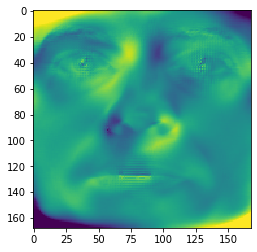

In [109]:
for i in net.parameters():
    result = i.data.numpy()
result = np.maximum(result, -10)
result = np.minimum(result, 10)
print(result)
plt.imshow(result)

In [52]:
# 保存模型， 请谨慎操作， 会覆盖文件中的模型
torch.save(net.state_dict(), './net.model')

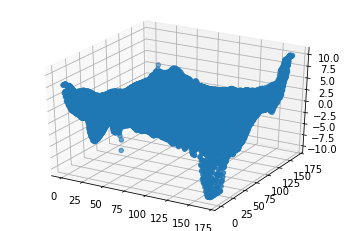

In [206]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.kron(np.arange(168), np.ones(168))
# print(x)
y = np.kron(np.ones(168), np.arange(168))
ax.scatter(x, y, result)
plt.show()

In [110]:
np.save('./dataset_offline/P3/z.npy',result)